In [130]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [131]:
df = pd.read_csv('benchmark_mongo_java_async.jar.csv', delimiter=';')
title = 'MongoDB 3.2 with async driver'

In [132]:
df['t_in_s'] = df['used_time'] / 1000.0
df['rows/s'] = 1 / (df['used_time'] / df['lines'] )* 1000

In [133]:
g = df.groupby(['threads', 'buffersize'])['t_in_s'].mean()

In [134]:
g2 = df.groupby(['threads', 'buffersize'])['rows/s'].mean()

## grouped by threads

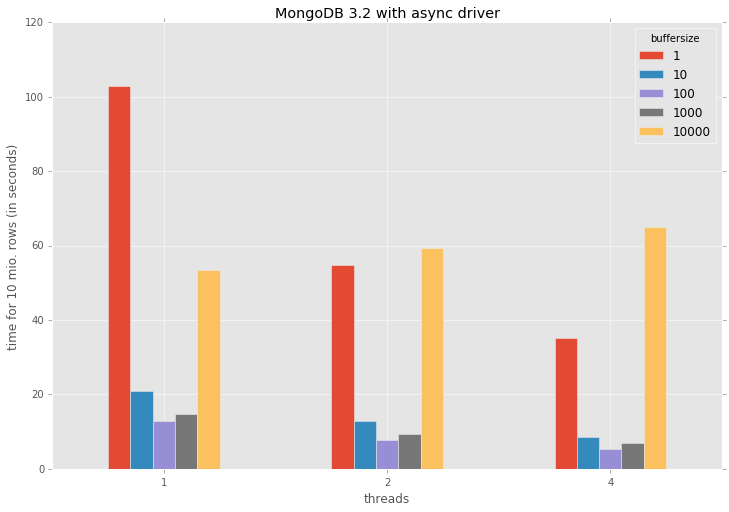

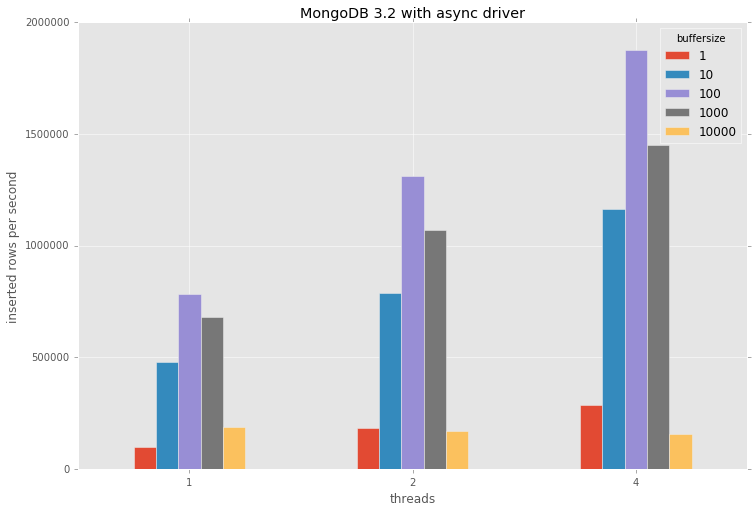

In [135]:
ax = g.unstack().plot(kind='bar',
                      figsize=(12,8), 
                      rot=0,
                      title=title)
ax.set_ylabel('time for 10 mio. rows (in seconds)')

ax = g2.unstack().plot(kind='bar',
                       figsize=(12,8),
                       rot=0,
                       title=title)
ax.set_ylabel('inserted rows per second')

## grouped by buffersize

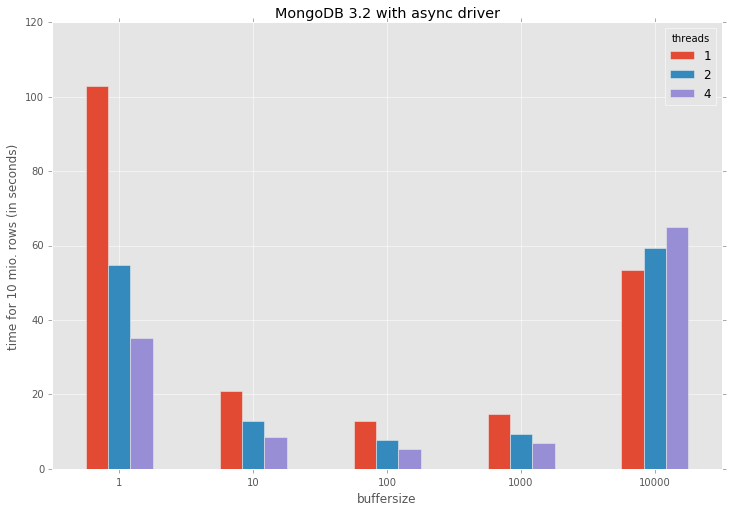

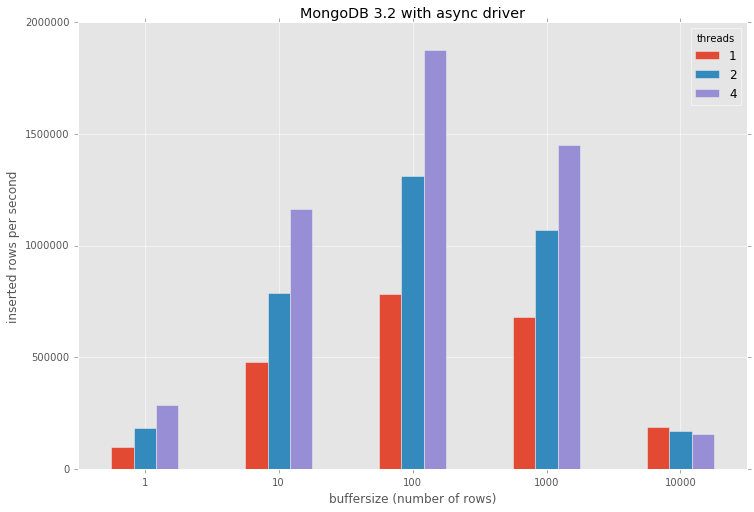

In [136]:
ax = g.unstack(0).plot(kind='bar',
                  figsize=(12,8), 
                       rot=0,
                  title=title)
ax.set_ylabel('time for 10 mio. rows (in seconds)')
ax = g2.unstack(0).plot(kind='bar', 
                   figsize=(12,8), 
                        rot=0,
                   title=title
                  )
ax.set_ylabel('inserted rows per second')
ax.set_xlabel('buffersize (number of rows)')